<a href="https://colab.research.google.com/github/tixomirof/mo2_team_colabs/blob/main/%D0%9C%D0%9E2_%D0%9A%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D0%B02_%D0%9B%D0%B0%D0%B101_v1_country_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Раздел 0

Состав команды:


*   Ибраева Асем
*   Киреева Анастасия
*   Рудин Валентин
*   Тихомиров Алексей



## Получение датасета

В первую очередь необходимо достать датасет с kaggle.com

Наш датасет: Анализ данных соискателей (https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource/data)

Краткое описание: 70000 данных с заявками на работу, где прогнозируемый признак - нанят/не нанят.

Я это сделаю через утилиту opendatasets, более подробный туториал о том как получить API ключ: https://www.geeksforgeeks.org/python/how-to-import-kaggle-datasets-directly-into-google-colab/

In [1]:
!pip install opendatasets
import opendatasets as od
import pandas as pd

In [2]:
od.download("https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Tikhomirow
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource


100%|██████████| 2.02M/2.02M [00:00<00:00, 126MB/s]

In [3]:
file =('70k-job-applicants-data-human-resource/stackoverflow_full.csv')
data = pd.read_csv(file)

## Визуализация данных

Рассмотрим данные, чтобы понять, с чем мы имеем дело.

In [4]:
data.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


Описание всех признаков:
* Age: возраст соискателя, >35 лет or <35 лет
(категориальный)
* EdLevel: уровень образования (Undergraduate - бакалавр, Master - магистр, PhD - доктор наук, NoHigherEd - нет высшего образования, Other - другое) (categorical)
* Gender: гендер соискателя (Man - мужчина, Woman - женщина, or NonBinary - небинарная личность) (категориальный)
* MainBranch: является ли соискатель профессиональным разработчиком (категориальный)
* YearsCode: лет опыта разработки (цело-числовой)
* YearsCodePro: лет коммерческого опыта разработки (цело-числовой)
* PreviousSalary: предыдущий уровень заработной платы соискателя (числовой)
* ComputerSkills: количество компьютерных навыков у соискателя (цело-числовой)
* Employed: прогнозируемый признак, был ли соискатель нанят (категориальный)
* HaveWorkedWith: стек соискателя с навыками перечисленными через ';' (категориальный)
* Country - страна (категориальный)
* MentalHealth - есть ли психические заболевания (категориальный)
* Employment - *датасет не предоставляет описания*
* Accessibility - *датасет не предоставляет описания*

Заметим, что ComputerSkills равно количеству технологий, перечисленных в HaveWorkedWith.
<br>Скорее всего, ComputerSkills - это искусственно введенный признак на основе HaveWorkedWith.
<br>На всякий случай проверим, чтобы число, указанное в ComputerSkills совпадало с количеством технологий в HaveWorkedWith во всем датасете.

In [5]:
dataTest = data[(data["HaveWorkedWith"].notna()) & (data["ComputerSkills"] != 0)]

In [6]:
dataTest = data[(data["HaveWorkedWith"].notna()) & (data["ComputerSkills"] != 0)].copy()
dataTest["HaveWorkedWith"] = dataTest["HaveWorkedWith"].fillna("")
dataTest["HaveWorkedWith_split"] = dataTest["HaveWorkedWith"].str.split(";").str.len().astype(int)
dataTest = dataTest[dataTest["HaveWorkedWith_split"] != dataTest["ComputerSkills"]]
dataTest

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,HaveWorkedWith_split


In [7]:
print(dataTest[["HaveWorkedWith","HaveWorkedWith_split", "ComputerSkills"]])

Empty DataFrame
Columns: [HaveWorkedWith, HaveWorkedWith_split, ComputerSkills]
Index: []


Записей с несовпадающим числом в ComputerSkills и количеством значений в HaveWorkedWith не нашлось.

### Числовые данные

In [8]:
data.describe()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,36730.500000,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,21206.797075,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,18365.250000,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,36730.500000,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,55095.750000,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,73461.000000,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


In [9]:
numerical_data = data.select_dtypes(include=['number'])
numerical_data.corr()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
Unnamed: 0,1.000000,0.046632,-0.002885,0.036799,0.078804,0.010194,0.072505
Employment,0.046632,1.000000,-0.080691,-0.092917,0.036980,-0.037904,-0.012142
YearsCode,-0.002885,-0.080691,1.000000,0.901073,0.390855,-0.020460,-0.003756
YearsCodePro,0.036799,-0.092917,0.901073,1.000000,0.393615,-0.012838,0.002886
PreviousSalary,0.078804,0.036980,0.390855,0.393615,1.000000,0.030362,0.000379
ComputerSkills,0.010194,-0.037904,-0.020460,-0.012838,0.030362,1.000000,0.585545
Employed,0.072505,-0.012142,-0.003756,0.002886,0.000379,0.585545,1.000000


In [10]:
import seaborn as sns

<Axes: >

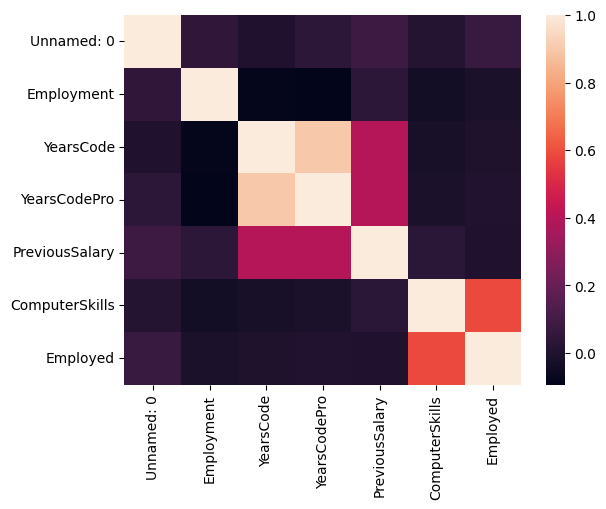

In [11]:
sns.heatmap(numerical_data.corr())

In [12]:
numerical_data.corr()['Employed'].sort_values()

,Employed
Employment,-0.012142
YearsCode,-0.003756
PreviousSalary,0.000379
YearsCodePro,0.002886
Unnamed: 0,0.072505
ComputerSkills,0.585545
Employed,1.000000


На первый взгляд корреляция для прогнозируемого признака есть только с признаком `ComputerSkills` - количеством компьютерных навыков у соискателя.

Выведем график и посмотрим по-внимательнее, как проявляется зависимость.

<Axes: xlabel='ComputerSkills', ylabel='Employed'>

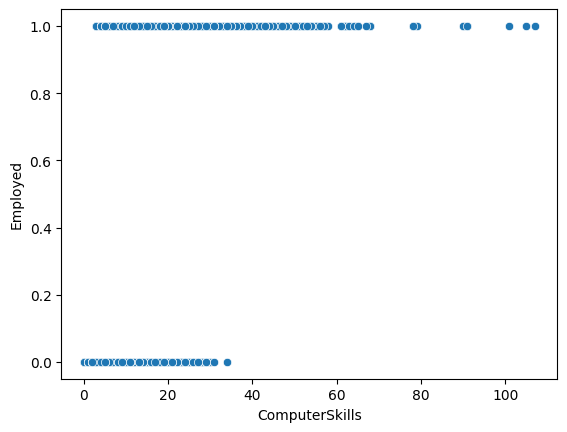

In [13]:
sns.scatterplot(x='ComputerSkills', y='Employed', data=numerical_data)

Действительно, те у кого количество навыков равно нулю - не получают работу. Напротив, те, у кого количество навыков переваливает за 40 - успешно получают работу.

Ради интереса взглянем на отношения признака `PreviousSalary` (предыдущая заработная плата) с прогнозируемым.

<Axes: xlabel='PreviousSalary', ylabel='Employed'>

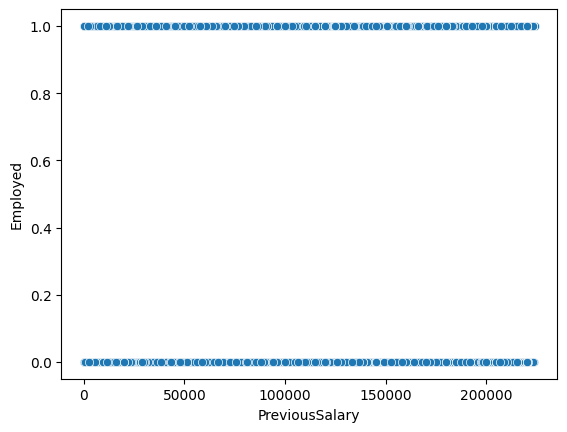

In [14]:
sns.scatterplot(x='PreviousSalary', y='Employed', data=numerical_data)

На графике действительно не видно никаких зависимостей.

Отбрасывать все признаки, которые не кореллируют с прогнозируемым мы пока не будем, попытаемся их сначала преобразовать в дальнешем изучении датасета.

<Axes: xlabel='YearsCode', ylabel='Employed'>

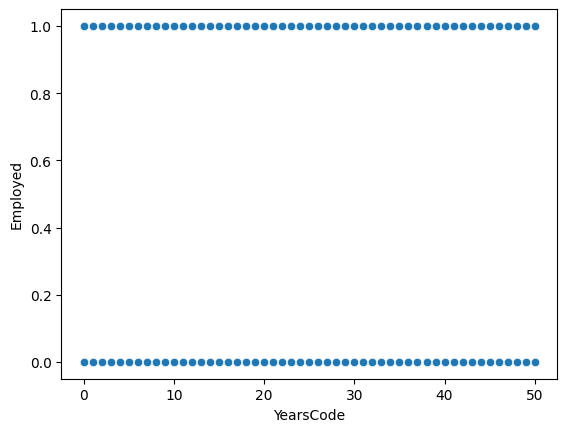

In [15]:
sns.scatterplot(x='YearsCode', y='Employed', data=numerical_data)

<Axes: xlabel='YearsCodePro', ylabel='Employed'>

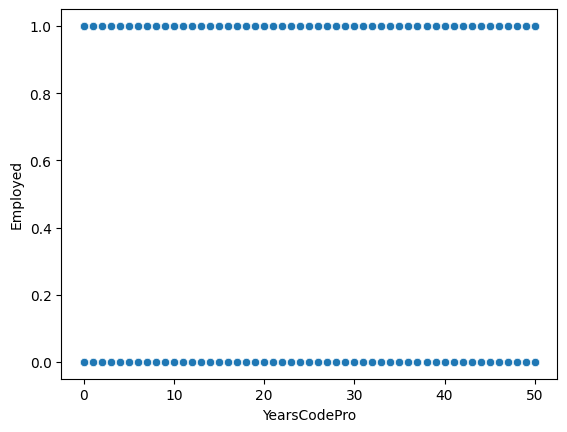

In [16]:
sns.scatterplot(x='YearsCodePro', y='Employed', data=numerical_data)

### Категориальные данные

Взглянем на категориальные переменные. Исключим признак HaveWorkedWith, потому что он имеет слишком много уникальных значений.

Категориальные признаки: ['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Country', 'Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 'MainBranch']

Связь с Employed:

Age:
Employed      0      1
Age                   
<35       0.453  0.547
>35       0.484  0.516


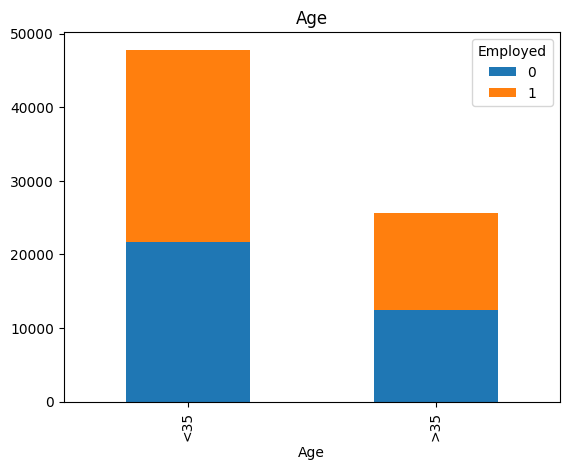


Accessibility:
Employed           0      1
Accessibility              
No             0.465  0.535
Yes            0.433  0.567


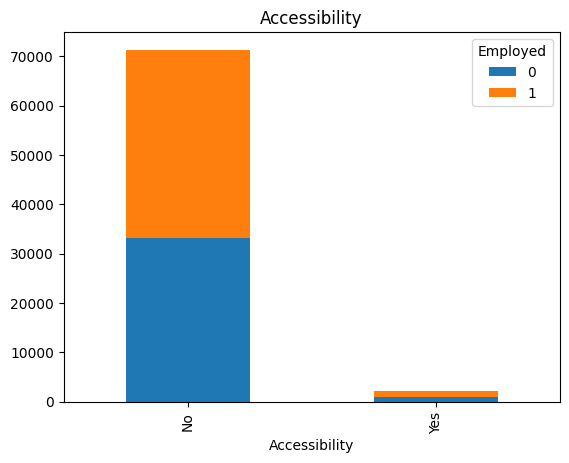


EdLevel:
Employed           0      1
EdLevel                    
Master         0.514  0.486
NoHigherEd     0.411  0.589
Other          0.416  0.584
PhD            0.714  0.286
Undergraduate  0.440  0.560


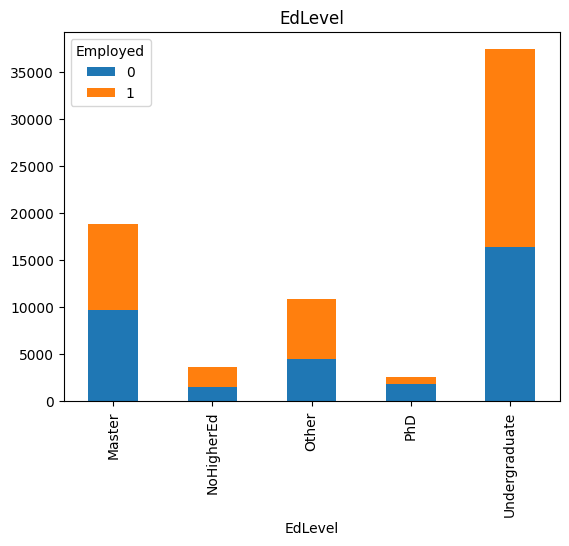


Gender:
Employed       0      1
Gender                 
Man        0.459  0.541
NonBinary  0.467  0.533
Woman      0.551  0.449


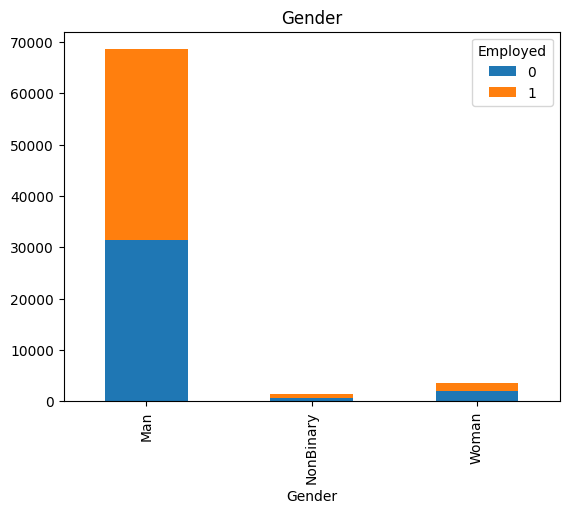


MentalHealth:
Employed          0      1
MentalHealth              
No            0.470  0.530
Yes           0.443  0.557


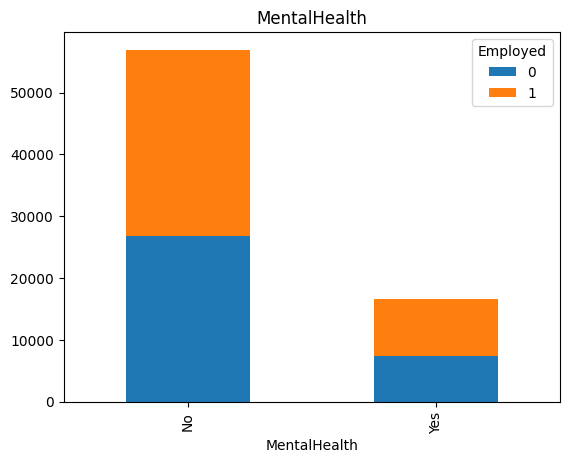


MainBranch:
Employed        0      1
MainBranch              
Dev         0.447  0.553
NotDev      0.651  0.349


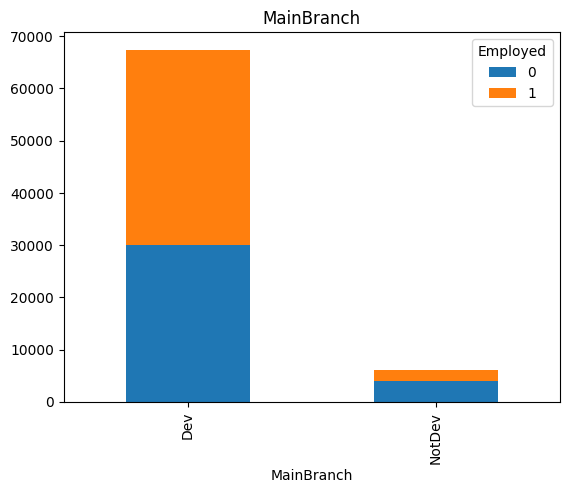


Country:
Employed                                  0      1
Country                                           
Afghanistan                           0.412  0.588
Albania                               0.339  0.661
Algeria                               0.579  0.421
Andorra                               0.364  0.636
Angola                                0.375  0.625
...                                     ...    ...
Venezuela, Bolivarian Republic of...  0.424  0.576
Viet Nam                              0.429  0.571
Yemen                                 0.556  0.444
Zambia                                0.385  0.615
Zimbabwe                              0.421  0.579

[172 rows x 2 columns]


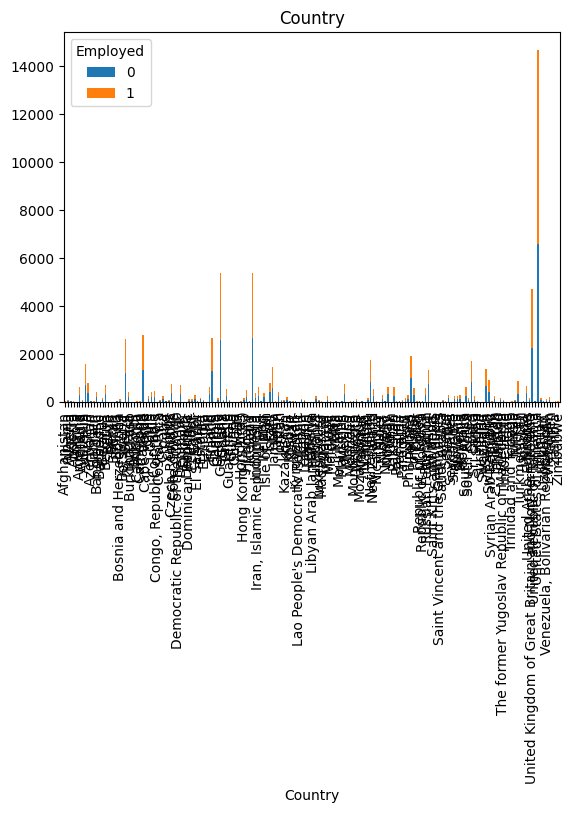


Age:
Employed      0      1
Age                   
<35       0.453  0.547
>35       0.484  0.516


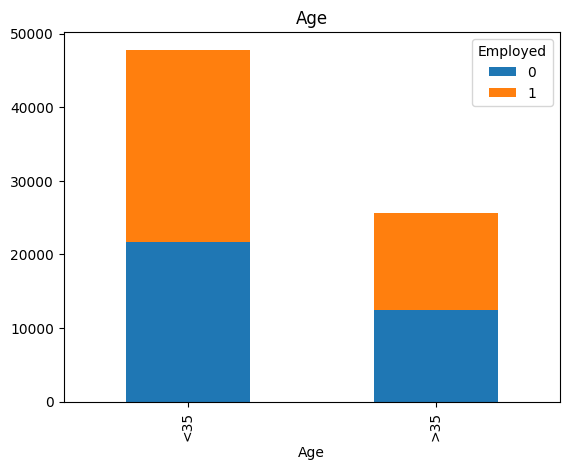


Accessibility:
Employed           0      1
Accessibility              
No             0.465  0.535
Yes            0.433  0.567


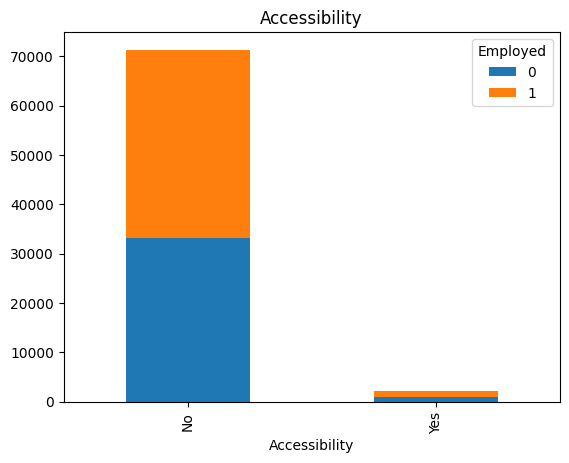


EdLevel:
Employed           0      1
EdLevel                    
Master         0.514  0.486
NoHigherEd     0.411  0.589
Other          0.416  0.584
PhD            0.714  0.286
Undergraduate  0.440  0.560


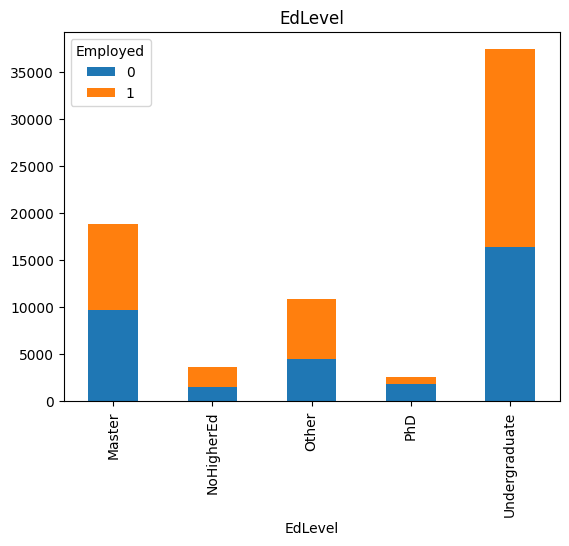


Employment:
Employed        0      1
Employment              
0           0.447  0.553
1           0.466  0.534


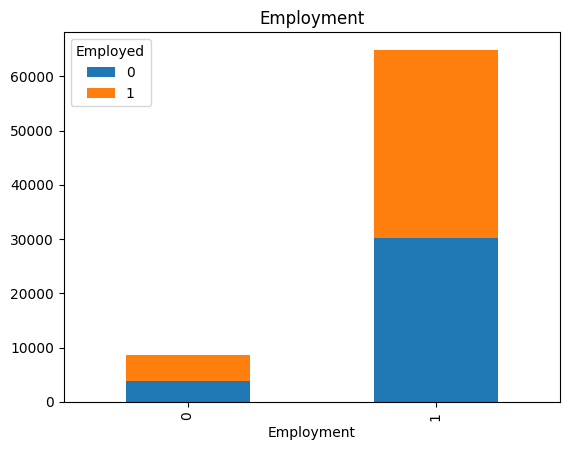


Gender:
Employed       0      1
Gender                 
Man        0.459  0.541
NonBinary  0.467  0.533
Woman      0.551  0.449


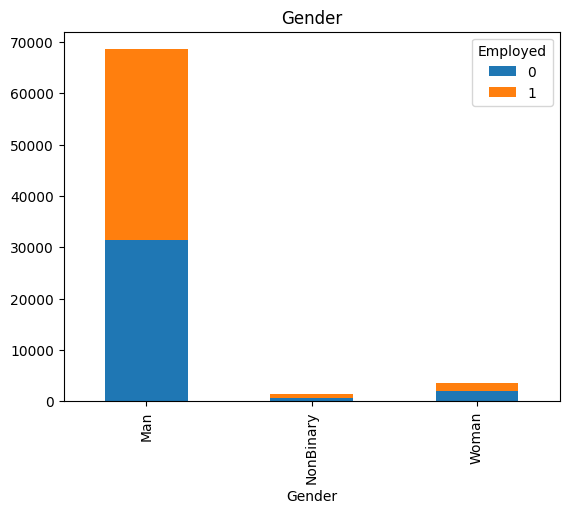


MentalHealth:
Employed          0      1
MentalHealth              
No            0.470  0.530
Yes           0.443  0.557


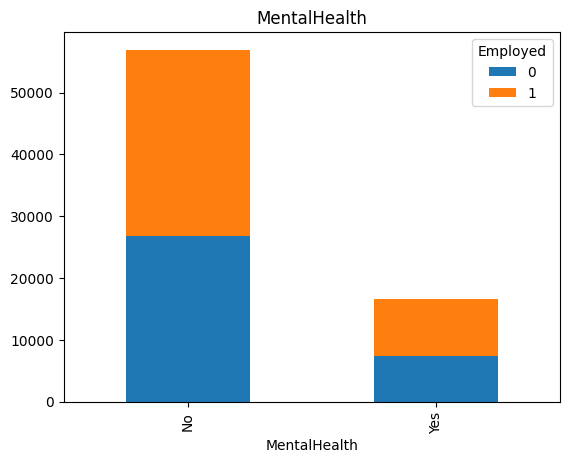


MainBranch:
Employed        0      1
MainBranch              
Dev         0.447  0.553
NotDev      0.651  0.349


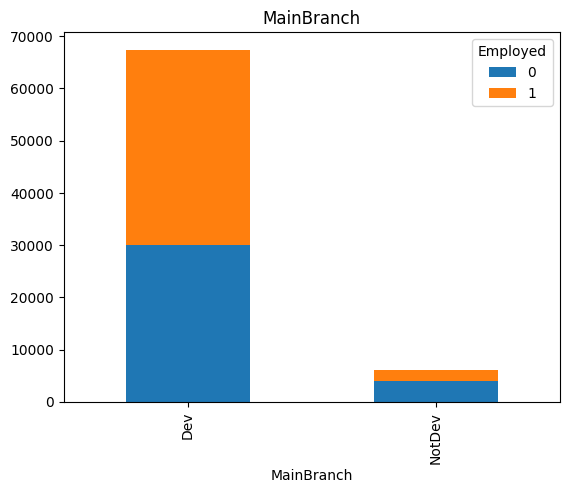

In [17]:
import matplotlib.pyplot as plt

categorical_data = data.drop(columns=['HaveWorkedWith'])
cat_cols = categorical_data.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols += [col for col in categorical_data.columns if col != 'Employed' and categorical_data[col].nunique() < 10]

print("Категориальные признаки:", cat_cols)
print("\nСвязь с Employed:")
for col in cat_cols:
    print(f"\n{col}:")
    print(pd.crosstab(categorical_data[col], categorical_data['Employed'], normalize='index').round(3))

    pd.crosstab(categorical_data[col], categorical_data['Employed']).plot(kind='bar', stacked=True)
    plt.title(col)
    plt.show()

Заметим по признаку EdLevel, если человек является PhD (доктор наук), то он в большинстве случаев не трудоустраивается.
<br>По признаку MainBranch, если человек не является профессиональным разработчиком, то он в большинстве случаев не нанимается.
<br>По остальным значениям не было выявлено каких-либо закономерностей (Country и HaveWorkedWith не рассматривались, т.к. там много уникальных значений, которые будут рассмотрены позднее).

# Раздел 1

## Работа с отсутствующими данными

Для начала посмотрим, есть ли в датасете отсутствующие данные.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [19]:
data.isnull().sum()

,0
Unnamed: 0,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0


In [20]:
pd.set_option('display.max_rows', None)
print(100* data.isnull().sum() / len(data))
pd.set_option('display.max_rows', 10) # Revert to default or a more reasonable number if needed later

Unnamed: 0        0.000000
Age               0.000000
Accessibility     0.000000
EdLevel           0.000000
Employment        0.000000
Gender            0.000000
MentalHealth      0.000000
MainBranch        0.000000
YearsCode         0.000000
YearsCodePro      0.000000
Country           0.000000
PreviousSalary    0.000000
HaveWorkedWith    0.085759
ComputerSkills    0.000000
Employed          0.000000
dtype: float64


Пустых данных почти нет. Создадим пустые данные самостоятельно, чтобы симулировать очистку данных.

In [21]:
import numpy as np

# Make a copy of the original DataFrame to avoid modifying it directly
data_without_nan = data.copy()
data_with_nan = data.copy()

# Columns to introduce NaNs into
columns_to_corrupt = ['Age', 'YearsCode', 'PreviousSalary', 'EdLevel']

# Calculate 1% of the total number of cells in the selected columns
num_cells = data_with_nan.shape[0] * len(columns_to_corrupt)
num_nans = int(num_cells * 0.01)

# Get all possible indices (row, column) for the selected columns
all_indices = [(r, c) for r in range(data_with_nan.shape[0]) for c in columns_to_corrupt]

# Randomly select indices to set to NaN
np.random.seed(42) # for reproducibility
indices_to_nan = np.random.choice(len(all_indices), num_nans, replace=False)

# Apply NaN values
for i in indices_to_nan:
    row, col = all_indices[i]
    data_with_nan.loc[row, col] = np.nan

data = data_with_nan

print(f"Introduced {num_nans} NaN values in columns: {columns_to_corrupt}")
print("Missing values after corruption:")
print(data[columns_to_corrupt].isnull().sum())

# Display a sample of the modified data to show NaNs
# This will show rows where NaNs might have been introduced
print("\nSample of data with introduced NaNs:")
print(data[data['Age'].isnull() | \
           data['YearsCode'].isnull() | \
           data['PreviousSalary'].isnull() | \
           data['EdLevel'].isnull()].head())

Introduced 2938 NaN values in columns: ['Age', 'YearsCode', 'PreviousSalary', 'EdLevel']
Missing values after corruption:
Age               729
YearsCode         724
PreviousSalary    752
EdLevel           733
dtype: int64

Sample of data with introduced NaNs:
    Unnamed: 0  Age Accessibility        EdLevel  Employment Gender  \
7            7  <35            No         Master           1    Man   
32          32  NaN            No            PhD           1    Man   
43          43  NaN            No  Undergraduate           1    Man   
63          63  <35            No         Master           1    Man   
68          68  NaN            No         Master           1    Man   

   MentalHealth MainBranch  YearsCode  YearsCodePro                   Country  \
7            No     NotDev       14.0             5               Switzerland   
32           No        Dev       18.0             1  United States of America   
43           No        Dev        8.0             3                  

Теперь имеются пропуски в данных. Рассмотрим их.

(0.0, 1.5)

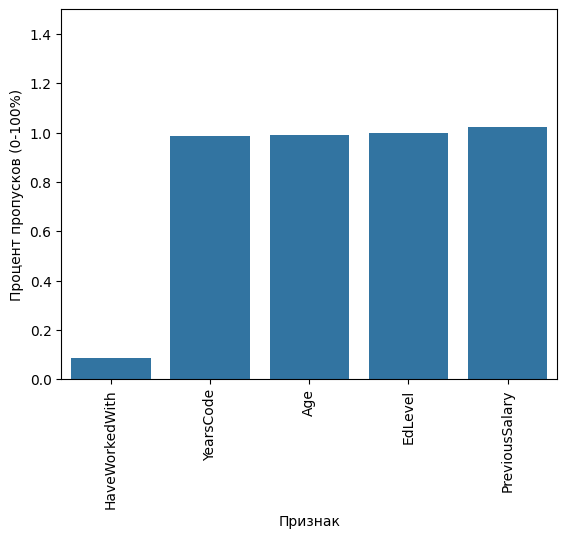

In [22]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

percent_nan = percent_missing(data)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.xlabel('Признак')
plt.ylabel('Процент пропусков (0-100%)')
plt.ylim(0,1.5)

Очевидно, все признаки, кроме `HaveWorkedWith` не имеют внятного объяснения пропуска:
* `YearsCode` - можно было бы объяснить пропуск тем, что опыт работы отсутствует, однако в датасете присутствует значение "0" (в ячейке ниже это проверяется), поэтому строки со значениями NULL удалим;
* `Age` - столбец имеет всего два значения: больше 35 или нет. Пропуск никак не интерпретируется, удаляем;
* `EdLevel` - признак может иметь значение 'Other' для всех остальных случаев, поэтому NULL не объясним здесь, удаляем;
* `PreviousSalary` - здесь чуть по-сложнее, об этом признаке ниже.

In [23]:
years_code_zero_count = data[data['YearsCode'] == 0].shape[0]
previous_salary_zero_count = data[data['PreviousSalary'] == 0].shape[0]

print(f"Количество записей, где YearsCode равен 0: {years_code_zero_count}")
print(f"Количество записей, где PreviousSalary равен 0: {previous_salary_zero_count}")

Количество записей, где YearsCode равен 0: 184
Количество записей, где PreviousSalary равен 0: 0


Признак `PreviousSalary` не имеет значений "0". Однако минимальное значение этого признака указано "1" в `data.describe()`. Посмотрим, сколько значений равно единице в датасете. Может быть, так помечена нулевая прошлая зарплата?

In [24]:
previous_salary_one_count = data[data['PreviousSalary'] == 1].shape[0]
print(f"Количество записей, где PreviousSalary равен 1: {previous_salary_one_count}")


Количество записей, где PreviousSalary равен 1: 7


Всего 7 записей. Попробуем посмотреть топ 100 минимальных предыдущих зарплат.

In [25]:
pd.set_option('display.max_rows', 100)
print(data['PreviousSalary'].nsmallest(100))
pd.set_option('display.max_rows', 10)

988       1.0
11973     1.0
22799     1.0
50178     1.0
58657     1.0
64751     1.0
70541     1.0
7456      2.0
28405     2.0
10875     3.0
43791     3.0
55161     3.0
56945     3.0
42073     4.0
53246     4.0
60117     4.0
69355     4.0
69703     4.0
22098     5.0
26589     5.0
48003     5.0
53238     5.0
55194     5.0
18869     6.0
48204     7.0
67584     7.0
56146     8.0
59952     8.0
69421     8.0
59168     9.0
10934    10.0
5983     12.0
8217     12.0
9076     12.0
16590    12.0
17029    12.0
40283    12.0
42865    12.0
43739    12.0
46567    12.0
50529    12.0
52544    12.0
52588    12.0
60695    12.0
62333    12.0
66360    12.0
69383    12.0
69734    12.0
70913    12.0
71084    12.0
71831    12.0
72508    12.0
72735    12.0
73183    12.0
61604    13.0
49990    14.0
57187    14.0
64763    20.0
21397    21.0
42578    21.0
8745     23.0
70018    23.0
7525     24.0
16448    24.0
26449    24.0
32196    24.0
39218    24.0
54066    24.0
55035    24.0
55241    24.0
59473    24.0
67792 

Любопытно, у признака имеются очень маленькие значения. Но разве возможны такие маленькие зарплаты? Думаю, нет. Учитывая, что признак показывал низкие показатели корреляции, можно сделать вывод, что он не то что не информативен, он и не несет в себе никакой смысловой нагрузки - просто случайные цифры.

Чтобы убедиться в этом, взглянем на строки, где `PreviousSalary` = 1.

In [26]:
data[data['PreviousSalary'] == 1]

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
988,988,>35,No,Master,1,Man,No,Dev,30.0,25,United States of America,1.0,C#;HTML/CSS;JavaScript;PowerShell;SQL;Docker;G...,16,1
11973,11973,>35,No,Undergraduate,0,Man,No,Dev,16.0,9,United States of America,1.0,Python;SQL;Docker;Git;Terraform;Django;Flask;A...,10,0
22799,22799,>35,No,Undergraduate,1,Man,No,NotDev,27.0,12,United States of America,1.0,Perl;Python;Git;Flask;Google Cloud Platform;SQ...,6,0
50178,50178,>35,Yes,NoHigherEd,0,Man,Yes,NotDev,13.0,50,Belgium,1.0,Java;PowerShell;Python;SQL;TypeScript;Chef;Doc...,37,1
58657,58657,<35,No,Master,1,Woman,No,Dev,15.0,11,India,1.0,Assembly;C#;HTML/CSS;JavaScript;MATLAB;PowerSh...,21,1
64751,64751,<35,No,Undergraduate,1,Man,No,Dev,7.0,5,Viet Nam,1.0,C#;JavaScript;PHP;Docker;Yarn;ASP.NET Core ;Bl...,14,0
70541,70541,<35,No,Master,1,Woman,No,Dev,8.0,2,India,1.0,C;C++;Java;Python;Docker;Kubernetes;ASP.NET;Dj...,11,0


У людей с большим опытом профессиональной разработки предыдущая зарплата - 1. Скорее всего, этот признак действительно не несет никакой смысловой нагрузки.

In [27]:
# может быть еще какие-то действия с этим столбцом?
# возможно стоит почистить данные, чтобы YearsCodePro не было больше YearsCode.

В признаке `HaveWorkedWith` (перечень умений соискателя) наблюдается небольшое количество пропусков. Оно означает, что соискатель не владеет никакими технологиями.

Выведем значения признака HaveWorkedWith и количество их повторений

In [28]:
HaveWorkedWith = data['HaveWorkedWith'].str.get_dummies(sep=';')
print(f'Количество уникальных значений HaveWorkedWith: {len(HaveWorkedWith.columns)}')
pd.set_option('display.max_rows', None)
print(HaveWorkedWith.sum().sort_values(ascending=False))
pd.set_option('display.max_rows', 5)

Количество уникальных значений HaveWorkedWith: 116
JavaScript                     49347
Docker                         40224
HTML/CSS                       40207
SQL                            38361
Git                            35911
AWS                            31590
Python                         31159
PostgreSQL                     30102
MySQL                          29490
TypeScript                     27533
Node.js                        26043
React.js                       24695
Java                           22653
Bash/Shell                     21929
C#                             21724
Microsoft SQL Server           20105
SQLite                         19324
jQuery                         18812
Microsoft Azure                17963
MongoDB                        17283
npm                            17066
Redis                          16595
PHP                            15409
Yarn                           15303
Kubernetes                     14775
Angular                 

Разделим эти технологии на отдельные категории и выделим новые признаки, имеющие значения, сколькими технологиями в этой категории владеет соискатель.

In [29]:
backend_languages = [
    'Python', 'Java', 'C#', 'PHP', 'Ruby', 'Go', 'Scala', 'Kotlin', 'Rust',
    'C++', 'C', 'Perl', 'Groovy', 'Clojure', 'Haskell', 'Elixir', 'Erlang',
    'F#', 'Julia', 'Lua', 'Dart', 'COBOL', 'Fortran', 'APL', 'OCaml',
    'Crystal', 'Solidity', 'Assembly'
]
frontend = [
    'JavaScript', 'TypeScript', 'HTML/CSS', 'jQuery', 'React.js',
    'Angular', 'Vue.js', 'Angular.js', 'Svelte', 'Gatsby', 'Next.js',
    'Nuxt.js', 'Flow', 'Blazor'
]
databases = [
    'SQL', 'PostgreSQL', 'MySQL', 'Microsoft SQL Server', 'SQLite',
    'MongoDB', 'Redis', 'MariaDB', 'Elasticsearch', 'Oracle',
    'DynamoDB', 'Cassandra', 'Firebase Realtime Database', 'Cloud Firestore',
    'Couchbase', 'Neo4j', 'CouchDB', 'IBM DB2'
]
devops = [
    'Docker', 'Git', 'AWS', 'Kubernetes', 'Microsoft Azure', 'npm',
    'Yarn', 'Terraform', 'Ansible', 'Jenkins', 'Google Cloud Platform',
    'Google Cloud', 'Heroku', 'DigitalOcean', 'VMware', 'Puppet',
    'Chef', 'OpenStack', 'Pulumi', 'Vagrant'
]
web_frameworks = [
    'Node.js', 'Express', 'ASP.NET Core', 'ASP.NET', 'Django', 'Flask',
    'Spring', 'Ruby on Rails', 'Laravel', 'Symfony', 'FastAPI',
    'Phoenix', 'Play Framework'
]
mobile = [
    'Swift', 'Kotlin', 'Java (Android)', 'Objective-C', 'React Native',
    'Flutter', 'Xamarin', 'Ionic', 'Cordova'
]
dev_tools = [
    'Bash/Shell', 'PowerShell', 'Homebrew', 'VBA', 'MATLAB', 'Matlab',
    'Deno', 'Unity 3D', 'Unreal Engine', 'Delphi'
]
game_dev = [
    'Unity 3D', 'Unreal Engine', 'OpenGL', 'WebGL', 'Three.js',
    'Blender', 'DirectX', 'Vulkan'
]
cloud_providers = [
    'AWS', 'Microsoft Azure', 'Google Cloud Platform', 'Google Cloud',
    'Heroku', 'DigitalOcean', 'OVH', 'Linode', 'IBM Cloud or Watson',
    'Oracle Cloud Infrastructure', 'Managed Hosting', 'Colocation'
]
data_science = [
    'Python', 'R', 'Pandas', 'NumPy', 'Matplotlib', 'TensorFlow',
    'PyTorch', 'Scikit-learn', 'Jupyter', 'Spark', 'Hadoop',
    'Tableau', 'Power BI', 'SAS', 'MATLAB', 'Matlab'
]

In [30]:
def group_technologies(tech_series):
    categories = {
        'backend_languages': backend_languages,
        'frontend': frontend,
        'databases': databases,
        'devops': devops,
        'web_frameworks': web_frameworks,
        'mobile': mobile,
        'dev_tools': dev_tools,
        'game_dev': game_dev,
        'cloud_providers': cloud_providers,
        'data_science': data_science
    }

    result_df = pd.DataFrame(index=tech_series.index)
    tech_lists = tech_series.fillna('').str.split(';')
    for category, tech_list in categories.items():
        tech_set = set(tech_list)
        counts = tech_lists.apply(
            lambda x: len(tech_set.intersection(set(x))) if isinstance(x, list) else 0
        )
        result_df[category] = counts
    return result_df

df_groups_HaveWorkedWith = group_technologies(data['HaveWorkedWith'])

In [31]:
df_groups_HaveWorkedWith

,backend_languages,frontend,databases,devops,web_frameworks,mobile,dev_tools,game_dev,cloud_providers,data_science
0,2,0,1,1,0,0,0,0,0,1
1,0,5,2,2,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
73460,1,6,4,3,1,0,0,0,1,0
73461,1,0,0,1,0,0,0,0,0,1


Проделаем колонку "Country" в числовой с помощью приминения мэппинга Страна -> ВВП Страны

In [32]:
# Загрузка данных ВВП Стран

from google.colab import files
import io

# Загрузка GDP.csv
uploaded = files.upload()
filename = next(iter(uploaded))

Saving GDP.csv to GDP.csv


In [33]:
# Небольшая предобработка
# Убираем лишние данные

gdp = pd.read_csv(io.BytesIO(uploaded[filename]))
gdp = gdp.drop(columns = ["Unnamed: 5", "Unnamed: 2"])
gdp = gdp.rename(columns = {
    "Unnamed: 0": "CountyCode",
    "Unnamed: 4": "gdp",
    "Unnamed: 3": "Country",
    "Gross domestic product 2023": "Num"
})
gdp = gdp.iloc[4:222]
gdp["gdp"] = (
    gdp["gdp"]
    .str.replace(",", "", regex=False)
)

gdp["gdp"] = pd.to_numeric(gdp["gdp"], errors="coerce")
gdp["gdp"] = gdp["gdp"] * 1000000
gdp.head()

,CountyCode,Num,Country,gdp
4,USA,1,United States,2.736094e+13
5,CHN,2,China,1.779478e+13
6,DEU,3,Germany,4.456081e+12
7,JPN,4,Japan,4.212945e+12
8,IND,5,India,3.549919e+12


In [34]:
# Редактируем названия некоторых стран
# Страны, по которым не было данных, заполняем вручную используя данные из открытых источников

gdp.loc[gdp["Country"] == "United States", "Country"] = "United States of America"
gdp.loc[gdp["Country"] == "Hong Kong SAR, China", "Country"] = "Hong Kong (S.A.R.)"
gdp.loc[gdp["Country"] == "Türkiye", "Country"] = "Turkey"
gdp.loc[gdp["Country"] == "Slovak Republic", "Country"] = "Slovakia"
gdp.loc[gdp["Country"] == "Egypt, Arab Rep.", "Country"] = "Egypt"
gdp.loc[gdp["Country"] == "Venezuela, RB", "Country"] = "Venezuela, Bolivarian Republic of..."
gdp.loc[gdp["Country"] == "Venezuela, Bolivarian Republic of...", "gdp"] = 102.38 * 1000000000
gdp.loc[gdp["Country"] == "Korea, Rep.", "Country"] = "South Korea"
gdp.loc[gdp["Country"] == "North Macedonia", "Country"] = "The former Yugoslav Republic of Macedonia"
gdp.loc[gdp["Country"] == "Moldova", "Country"] = "Republic of Moldova"
gdp.loc[gdp["Country"] == "Lao PDR", "Country"] = "Lao People's Democratic Republic"
gdp.loc[gdp["Country"] == "Cuba", "gdp"] = 201.99 * 1000000000
gdp.loc[gdp["Country"] == "Tanzania", "Country"] = "United Republic of Tanzania"
gdp.loc[gdp["Country"] == "Congo, Dem. Rep.", "Country"] = "Democratic Republic of the Congo"
gdp.loc[gdp["Country"] == "Yemen, Rep.", "Country"] = "Yemen"
gdp.loc[gdp["Country"] == "Yemen", "gdp"] = 19.41 * 1000000000
gdp.loc[gdp["Country"] == "Korea, Dem. People's Rep.", "Country"] = "Republic of Korea"
gdp.loc[gdp["Country"] == "Republic of Korea", "gdp"] = 48.3 * 1000000000
gdp.loc[gdp["Country"] == "Kyrgyz Republic", "Country"] = "Kyrgyzstan"
gdp.loc[gdp["Country"] == "St. Kitts and Nevis", "Country"] = "Saint Kitts and Nevis"
gdp.loc[gdp["Country"] == "Libya", "Country"] = "Libyan Arab Jamahiriya"
gdp.loc[gdp["Country"] == "St. Lucia", "Country"] = "Saint Lucia"
gdp.loc[gdp["Country"] == "Cabo Verde", "Country"] = "Cape Verde"
gdp.loc[gdp["Country"] == "St. Vincent and the Grenadines", "Country"] = "Saint Vincent and the Grenadines"
gdp.loc[gdp["Country"] == "Gambia, The", "Country"] = "Gambia"

taiwan = {
    "CountryCode": None,
    "Num": None,
    "Country": "Taiwan",
    "gdp": 757.3 * 1000000000
}

palestine = {
    "CountryCode": None,
    "Num": None,
    "Country": "Palestine",
    "gdp": 17.8 * 1000000000
}

swaziland = {
    "CountryCode": None,
    "Num": None,
    "Country": "Swaziland",
    "gdp": 4.60 * 1000000000
}


gdp.loc[len(gdp) + 10] = taiwan

gdp.loc[len(gdp) + 11] = palestine

gdp.loc[len(gdp) + 12] = swaziland

In [35]:
data.loc[data["Country"].str.startswith("United Kingdom of Great Britain and Northern"), "Country"] = "United Kingdom"
data.loc[data["Country"].str.startswith("Iran, Islamic Republic of"), "Country"] = "Iran, Islamic Rep."
data.loc[data["Country"].str.startswith("Congo, Republic of the"), "Country"] = "Congo, Rep."

data_with_gdp = data.merge(
    gdp[["Country", "gdp"]],
    on="Country",
    how="left"
)

gdp = data_with_gdp[["gdp"]]

In [36]:

# first_world = [
#         'Andorra', 'Australia', 'Austria', 'Belgium', 'Canada',
#         'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
#         'Finland', 'France', 'Germany', 'Greece', 'Hong Kong (S.A.R.)',
#         'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
#         'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
#         'New Zealand', 'Norway', 'Poland', 'Portugal', 'Singapore',
#         'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
#         'Switzerland', 'Taiwan', 'United Kingdom of Great Britain and Northern Ir...',
#         'United States of America'
#     ]


# second_world = [
#         'Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan',
#         'Bahrain', 'Barbados', 'Belarus', 'Bosnia and Herzegovina',
#         'Botswana', 'Brazil', 'Bulgaria', 'Chile', 'China', 'Colombia',
#         'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'Egypt',
#         'El Salvador', 'Georgia', 'Ghana', 'Guatemala', 'India',
#         'Indonesia', 'Iran, Islamic Republic of...', 'Iraq', 'Jamaica',
#         'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan',
#         'Lebanon', 'Malaysia', 'Maldives', 'Mauritius', 'Mexico',
#         'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nigeria',
#         'The former Yugoslav Republic of Macedonia', 'Oman', 'Pakistan',
#         'Palestine', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Qatar',
#         'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation',
#         'Saudi Arabia', 'Serbia', 'South Africa', 'Sri Lanka', 'Thailand',
#         'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
#         'Ukraine', 'United Arab Emirates', 'Uruguay', 'Uzbekistan',
#         'Venezuela, Bolivarian Republic of...', 'Viet Nam'
#     ]

# third_world = [
#         'Afghanistan', 'Angola', 'Bangladesh', 'Belize', 'Benin',
#         'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia',
#         'Cameroon', 'Cape Verde', 'Congo, Republic of the...',
#         'Côte d\'Ivoire', 'Democratic Republic of the Congo', 'Djibouti',
#         'Dominica', 'Ethiopia', 'Fiji', 'Gambia', 'Guinea',
#         'Guyana', 'Haiti', 'Honduras', 'Lao People\'s Democratic Republic',
#         'Lesotho', 'Liberia', 'Libyan Arab Jamahiriya', 'Madagascar',
#         'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal',
#         'Nicaragua', 'Niger', 'Rwanda', 'Saint Kitts and Nevis',
#         'Saint Lucia', 'Saint Vincent and the Grenadines', 'Senegal',
#         'Seychelles', 'Somalia', 'Sudan', 'Suriname', 'Swaziland',
#         'Syrian Arab Republic', 'Tajikistan', 'Timor-Leste', 'Togo',
#         'Uganda', 'United Republic of Tanzania', 'Yemen', 'Zambia',
#         'Zimbabwe'
#     ]

In [37]:
# def get_category_name(country):
#         if country in set(first_world):
#             return 'first_world'
#         elif country in set(second_world):
#             return 'second_world'
#         elif country in set(third_world):
#             return 'third_world'
#         else:
#             return 'unknown'

In [38]:
# def group_countries(country_series):
#   country_categories = {
#         'first_world': first_world,
#         'second_world': second_world
#     }

#   result_df = pd.DataFrame(index=country_series.index)

#   for category, country_list in country_categories.items():
#        country_set = set(country_list)

#        belongs_to_category = country_series.apply(
#            lambda x: 1 if x in country_set else 0
#        )

#        result_df[category] = belongs_to_category

#   return result_df

# df_country_groups = group_countries(data['Country'])

# df_country_groups

# Раздел 2

## Работа с категориальными признаками

Применим ко всем категориальным признакам OneHotEncoder.


In [39]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [40]:
categorical_data = categorical_data.drop(columns=['Country'])
cat_cols = categorical_data.select_dtypes(include=['object', 'category']).columns.tolist()

In [41]:
encoded_df = pd.get_dummies(categorical_data[cat_cols],drop_first=True)

In [42]:
encoded_df

,Age_>35,Accessibility_Yes,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_NonBinary,Gender_Woman,MentalHealth_Yes,MainBranch_NotDev
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
73460,False,True,False,False,False,True,False,False,True,False
73461,False,False,False,False,False,False,True,False,False,False


In [43]:
pd.set_option('display.max_rows', 10)

Объединим обработанные данные в один датафрейм

In [47]:
resData = pd.concat([numerical_data, df_groups_HaveWorkedWith, encoded_df, gdp], axis=1)

In [48]:
resData

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,backend_languages,frontend,databases,...,Accessibility_Yes,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_NonBinary,Gender_Woman,MentalHealth_Yes,MainBranch_NotDev,gdp
0,0,1,7,4,51552.0,4,0,2,0,1,...,False,False,False,False,False,False,False,False,False,5.932680e+11
1,1,1,12,5,46482.0,12,1,0,5,2,...,False,False,False,False,True,False,False,False,False,1.580695e+12
2,2,1,15,6,77290.0,7,0,5,0,0,...,False,False,False,False,False,False,False,False,False,4.456081e+12
3,3,1,9,6,46135.0,13,0,2,3,3,...,False,False,False,False,True,False,False,False,False,2.140086e+12
4,4,0,40,30,160932.0,2,0,2,0,0,...,False,False,False,True,False,False,False,False,True,5.014280e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,1,7,2,41058.0,13,1,1,5,3,...,False,False,False,False,True,False,False,False,False,4.456081e+12
73458,73458,1,21,16,115000.0,11,1,2,2,2,...,False,False,False,False,True,False,False,False,False,2.736094e+13
73459,73459,1,4,3,57720.0,12,1,0,4,2,...,False,False,False,False,True,False,False,False,False,3.628150e+11
73460,73460,1,5,1,70000.0,15,1,1,6,4,...,True,False,False,False,True,False,False,True,False,2.736094e+13


In [49]:
resData.to_csv('resData.csv', index=False)